#Statstronauts



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from google.colab import drive
import datetime
import itertools
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
df = pd.read_csv('/content/drive/MyDrive/Rakamin/Final Project Statstronauts/Copy of marketing_campaign.csv',sep=';')

#1. Descriptive Statistics

In [3]:
df.sample(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1362,9967,1974,Graduation,Divorced,53034.0,1,1,2013-05-30,30,160,...,8,0,0,0,0,0,0,3,11,0
1548,591,1957,Graduation,Widow,66033.0,0,1,2013-01-20,76,293,...,7,0,0,0,0,0,0,3,11,0
1726,10905,1955,Graduation,Together,42586.0,1,1,2012-10-29,7,194,...,8,0,0,0,0,0,0,3,11,1
249,8932,1969,Master,Together,65176.0,0,1,2012-10-29,57,960,...,6,0,0,0,0,0,0,3,11,0
236,2936,1982,Master,Together,23661.0,1,0,2013-12-04,46,18,...,7,0,0,0,0,0,0,3,11,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
cats =['Education','Marital_Status']
boolean =['AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2','Response','Complain']
nums =['Income','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','Z_CostContact','Z_Revenue']
df.sample(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2231,9817,1970,Master,Single,44802.0,0,0,2012-08-21,71,853,...,8,0,0,0,0,0,0,3,11,0
2144,5136,1973,Graduation,Single,65333.0,0,1,2014-01-17,58,654,...,6,0,1,1,0,0,0,3,11,0
1921,3283,1972,2n Cycle,Married,70932.0,0,1,2014-01-19,57,200,...,3,0,0,0,0,0,0,3,11,0
818,3900,1972,Graduation,Married,65685.0,0,1,2014-03-29,54,642,...,5,0,0,0,0,0,0,3,11,0
2017,10598,1967,Graduation,Together,27943.0,1,1,2013-04-15,89,12,...,8,0,0,0,0,0,0,3,11,0


In [6]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [7]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [8]:
df['Z_CostContact'].unique()

array([3])

In [9]:
df['Z_Revenue'].unique()

array([11])

In [10]:
df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [11]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [12]:
df[cats].describe()

,Education,Marital_Status
count,2240,2240
unique,5,8
top,Graduation,Married
freq,1127,864


In [13]:
df_duplicate = df[df.duplicated(keep ='last')]
df_duplicate

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


In [14]:
df[nums].describe()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue
count,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0
mean,52247.251354,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,3.0,11.0
std,25173.076661,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.0,0.0
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0
25%,35303.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,3.0,11.0
50%,51381.500000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,3.0,11.0
75%,68522.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,3.0,11.0
max,666666.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,3.0,11.0


In [15]:
def cek_whitespace(val):
    return val.isspace() if isinstance(val, str) else False

hasil_cek = df.applymap(cek_whitespace)

# Menentukan baris yang memiliki whitespace di setidaknya satu kolom
baris_dengan_whitespace = hasil_cek.any(axis=1)

# Menyimpan nilai asli pada baris yang memiliki whitespace
nilai_asli = df[baris_dengan_whitespace]

# Menghapus baris yang kolomnya tidak memiliki whitespace
df_tanpa_whitespace = df[~hasil_cek.all(axis=1)]

# Menyimpan nilai asli untuk kolom yang memiliki whitespace
df_whitespace_only = df[baris_dengan_whitespace]
df_whitespace_only

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


##A. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya kurang sesuai?
*   **Terdapat categorical Widow, Together, Alone, YOLO, Absurd yang perlu ditelaah ulang categoricalnya**

##B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?
*   **Terdapat 24 data kosong pada kolom data income
Tidak adanya data yang duplicate**
*   **Tidak adanya data yang duplicate**

##C. Apakah ada kolom yang memiliki nilai summary agak aneh? (min/mean/median/max/unique/top/freq)
*   **Terdapat data umur yang aneh, yaitu min 1893**
*   **Income max nya 666666, dan jauh dari mean (52427)**
*   **Terdapat kolom Z_CostContact, dan Z_Revenue yang bernilai sama untuk semua baris**
* **Untuk Marital Status ada beberapa kategori yang bisa digabung agar data menjadi lebih sederhana, Together dan Married , Widow dan Divorced**

* **Untuk Education ada beberapa kategori 2n Cycle bisa digabung dengan Master karena sama**

#2. Univariate Analysis

In [16]:
cats =['Education','Marital_Status']
booleans =['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response','Complain']
nums =['Income','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','Z_CostContact','Z_Revenue']

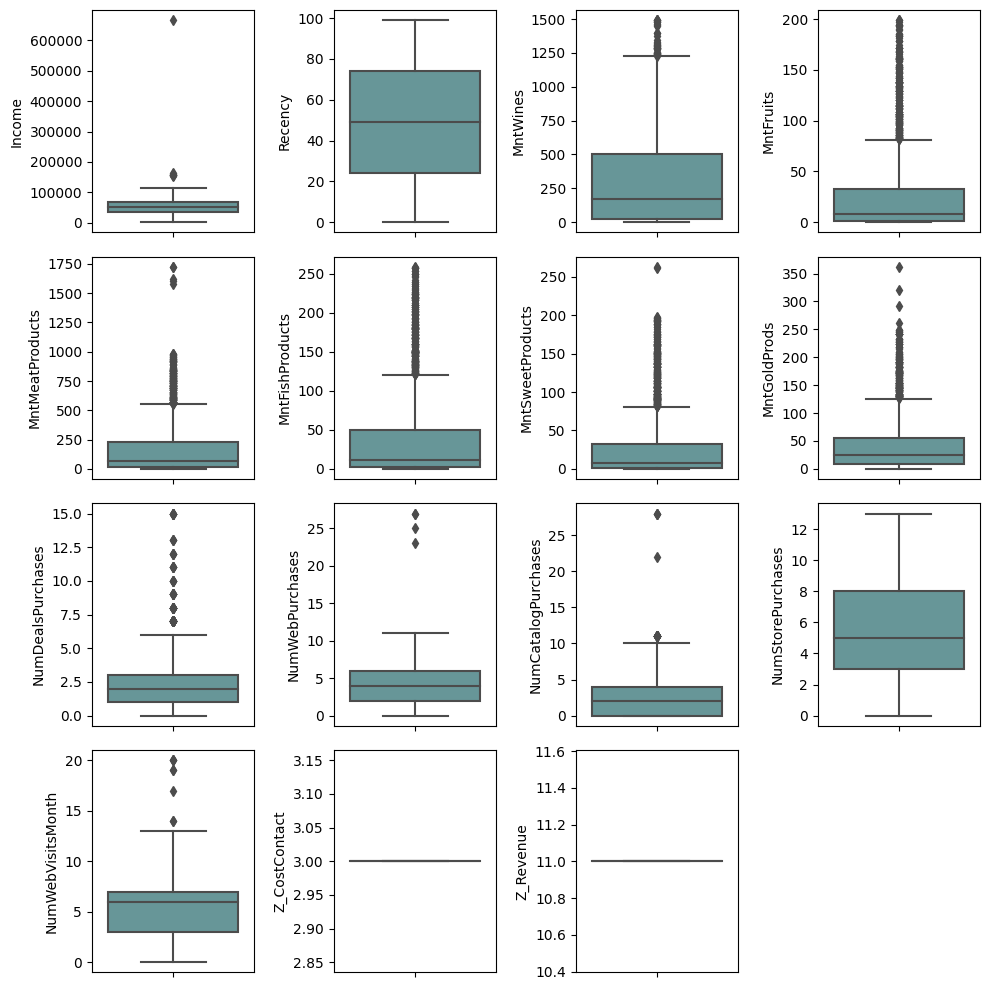

In [17]:
plt.figure (figsize=(10,10))
for i in range (0, len(nums)):
  plt.subplot (4,4,i+1)
  sns.boxplot(y=df[nums[i]],color = 'cadetblue',orient ='v')
  plt.tight_layout()

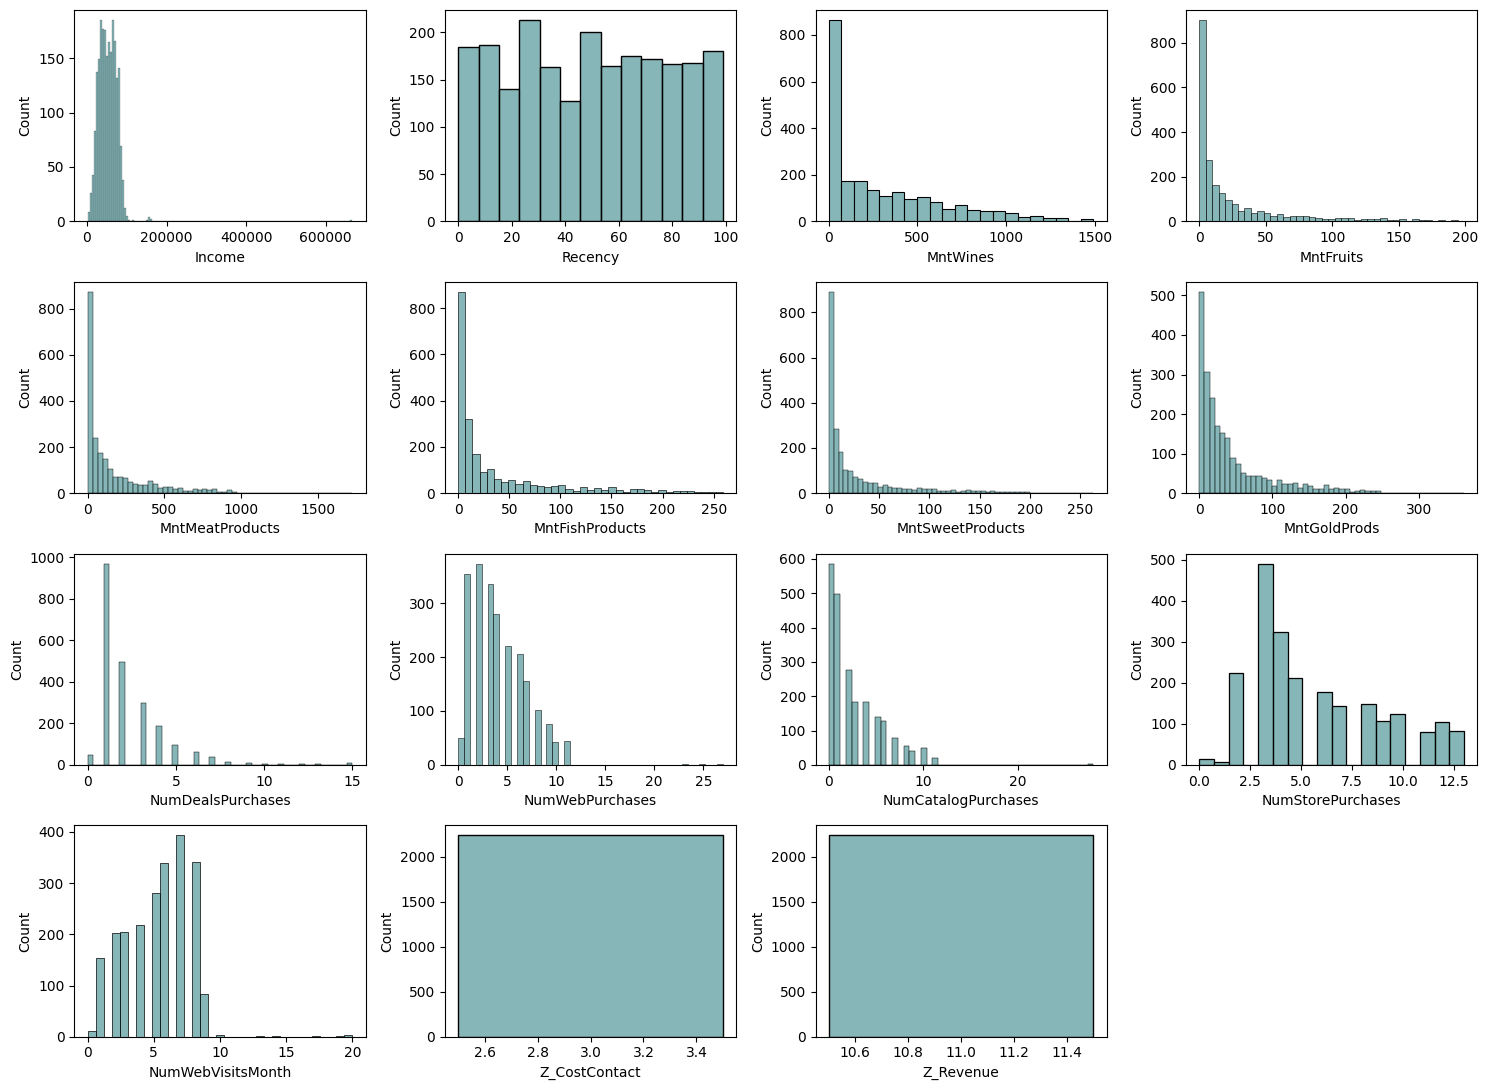

In [34]:
plt.figure(figsize=(15,11))
for i in range (0,len(nums)):
  plt.subplot (4,4,i+1)
  sns.histplot(df[nums[i]],color ='cadetblue')
plt.tight_layout()

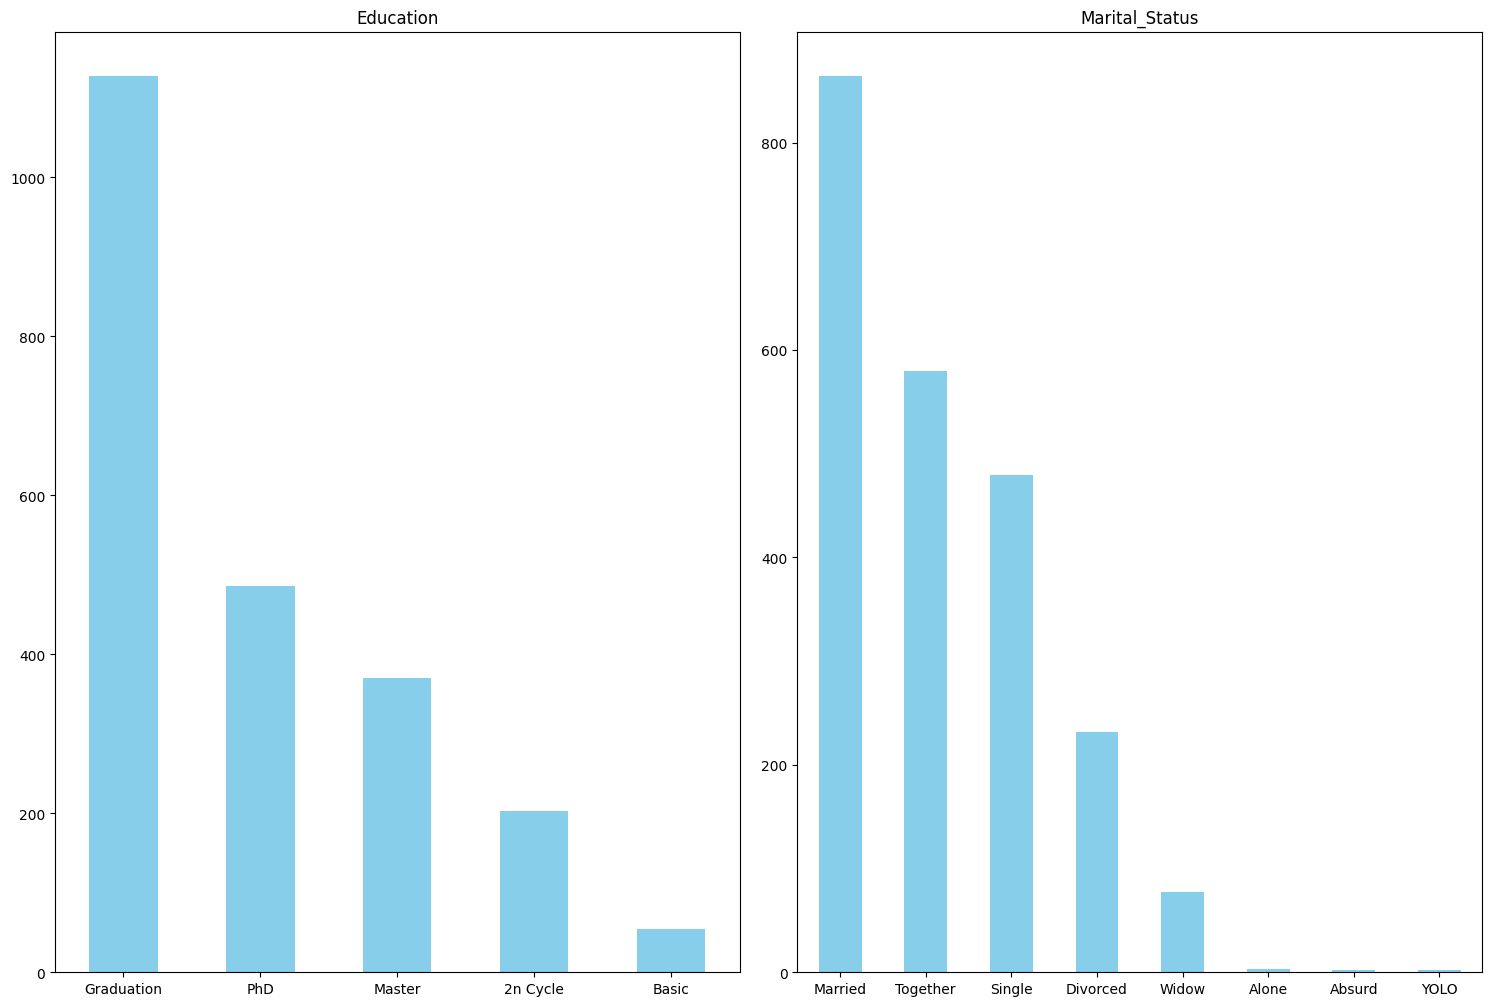

In [19]:
# Membuat subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))

# Mengatur layout subplot
plt.tight_layout()

plt.subplots_adjust(hspace=0.5)

# Iterasi melalui kategori dan membuat bar chart
for i, cat in enumerate(cats):
    ax = axes.flatten()[i]
    # Menggunakan value_counts() dan sort_values() untuk mengurutkan berdasarkan jumlah
    df[cat].value_counts().sort_values(ascending=False).plot(kind='bar', ax=ax, color='skyblue')
    ax.set_title(cat)
    ax.set_xlabel('')
    ax.tick_params(axis='x', labelrotation=0)  # Menambahkan labelrotation untuk membuat teks horizontal

# Menampilkan plot
plt.show()

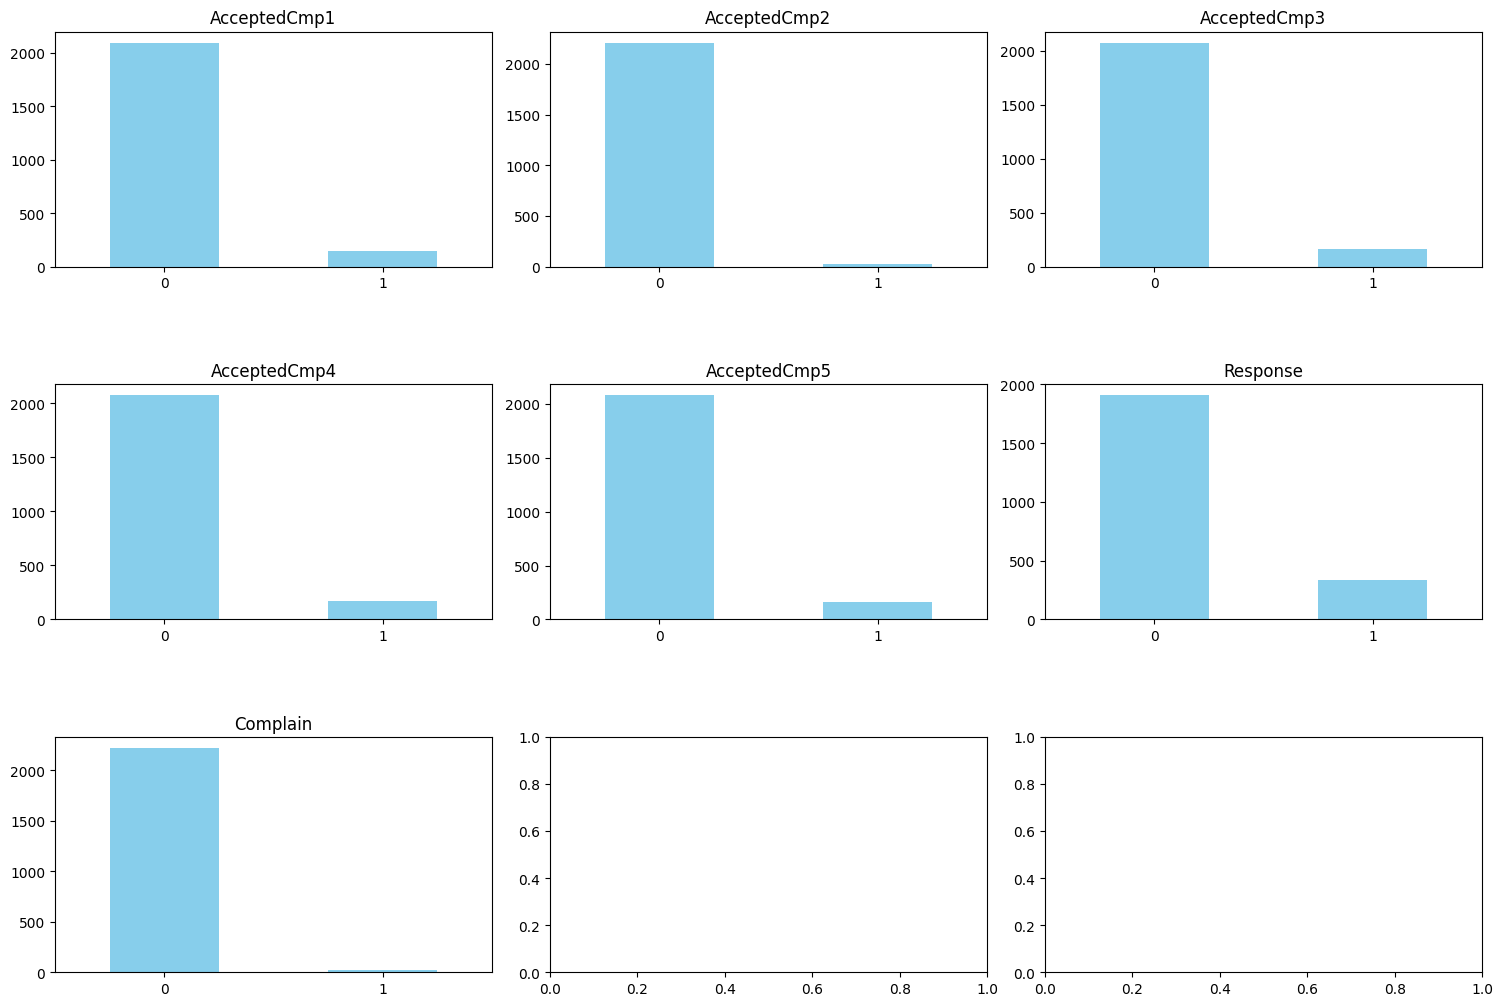

In [20]:
# Membuat subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

# Mengatur layout subplot
plt.tight_layout()

plt.subplots_adjust(hspace=0.5)

# Iterasi melalui kategori dan membuat bar chart
for i, boolean in enumerate(booleans):
    ax = axes.flatten()[i]
    # Menggunakan value_counts() dan sort_values() untuk mengurutkan berdasarkan jumlah
    df[boolean].value_counts().sort_values(ascending=False).plot(kind='bar', ax=ax, color='skyblue')
    ax.set_title(boolean)
    ax.set_xlabel('')
    ax.tick_params(axis='x', labelrotation=0)  # Menambahkan labelrotation untuk membuat teks horizontal

# Menampilkan plot
plt.show()

## Jawaban Nomor 2
* Terdapat outliers yang perlu dihilangkan.

* Nyaris pada seluruh categories pada Nums [Income, Amount of Wines,Fruit,Meat,Fish,Sweet,Gold,Deals Purchase,Web Purchase,Catalog Purchase,Store Purchase]
adalah positively skewed. Pada data ini berarti mean > median, dimana terdapat beberapa high values yang berada pada spektrum outliers.

* Untuk Recency merupakan bimodal, dimana berarti terdapat 2 modus yang tinggi.

* Untuk regency berdasarkan histogram, data tidak terlalu mengikuti distribusi normal. Hal ini bisa dijadikan identifikasi awal bahwa data kemungkinan tidak normal.

* Untuk Web Visit per Month adalah left skewed, dimana data berarti median > mean.

* Untuk pilihan YOLO, Alone, Absurd memiliki frekuensi yang sangat kecil sehingga bisa diperkirakan bahwa pilihan ini adalah outliers Categorical Married dan Together bisa dikategorikan sebagai sama. Begitu juga dengan widow dan divorced.







#3. Multivariate Analysis

<Axes: >

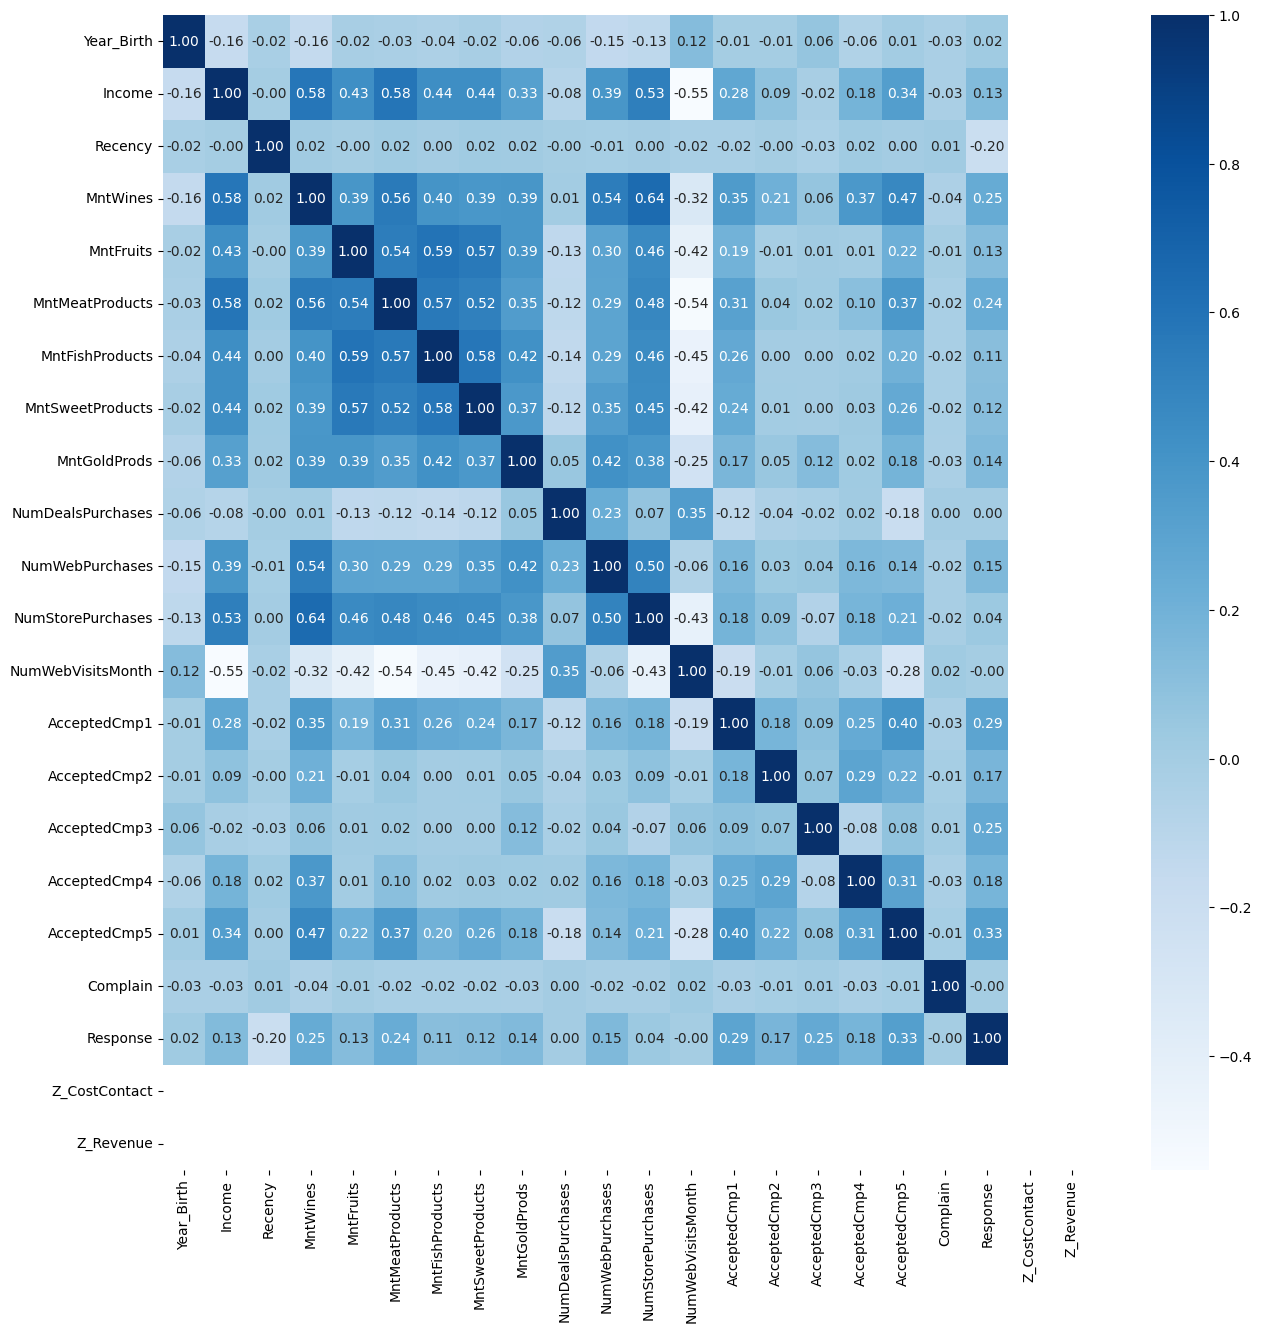

In [21]:
corr_list = ['Year_Birth', 'Income',  'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain','Response', 'Z_CostContact', 'Z_Revenue']
plt.figure(figsize=(15, 15))
sns.heatmap(df[corr_list].corr(),cmap='Blues',annot=True,fmt='.2f')

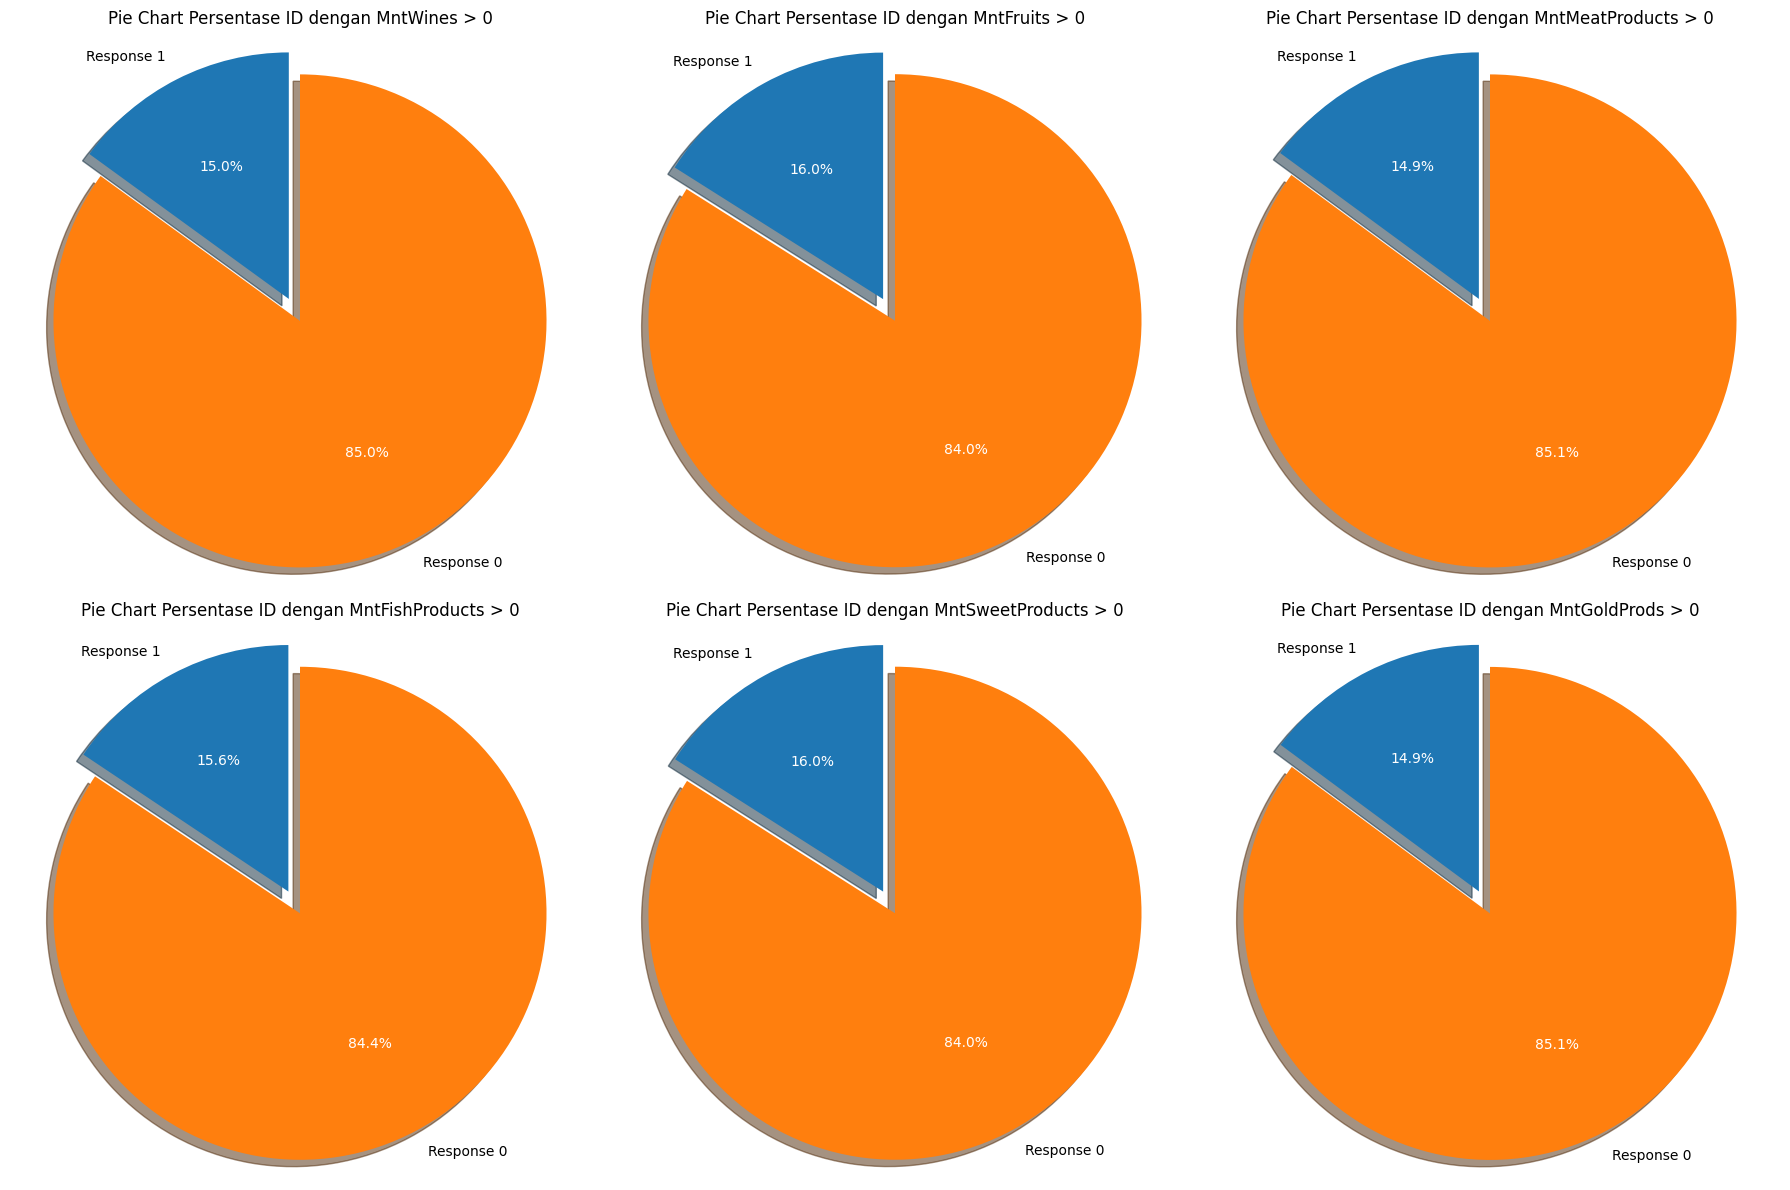

In [22]:
columns_to_plot = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

df_response_1 = df[df['Response'] == 1]

# Filter dataframe untuk Response 0
df_response_0 = df[df['Response'] == 0]
# Hitung total jumlah ID
total_ids = len(df)

# Inisialisasi subplot
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
axes = axes.flatten()

# Loop untuk setiap kolom
for i, column in enumerate(columns_to_plot):
    # Hitung jumlah ID yang nilai kolom > 0 untuk setiap kelompok
    count_response_1 = (df_response_1[column] > 0).sum()
    count_response_0 = (df_response_0[column] > 0).sum()

    # Hitung persentase dari jumlah ID yang nilai kolom > 1
    percentage_response_1 = count_response_1 / total_ids * 100
    percentage_response_0 = count_response_0 / total_ids * 100

    # Plot pie chart
    explode = (0.1, 0)  # Untuk memberi efek slice terpisah
    pie_chart = axes[i].pie([percentage_response_1, percentage_response_0], labels=['Response 1', 'Response 0'], autopct='%1.1f%%', startangle=90, explode=explode, shadow=True)

    # Ubah warna teks persentase menjadi putih
    for text in pie_chart[2]:
        text.set_color('white')

    # Tambahkan label dan judul
    axes[i].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    axes[i].set_title(f'Pie Chart Persentase ID dengan {column} > 0')

# Tampilkan plot
plt.tight_layout()
plt.show()

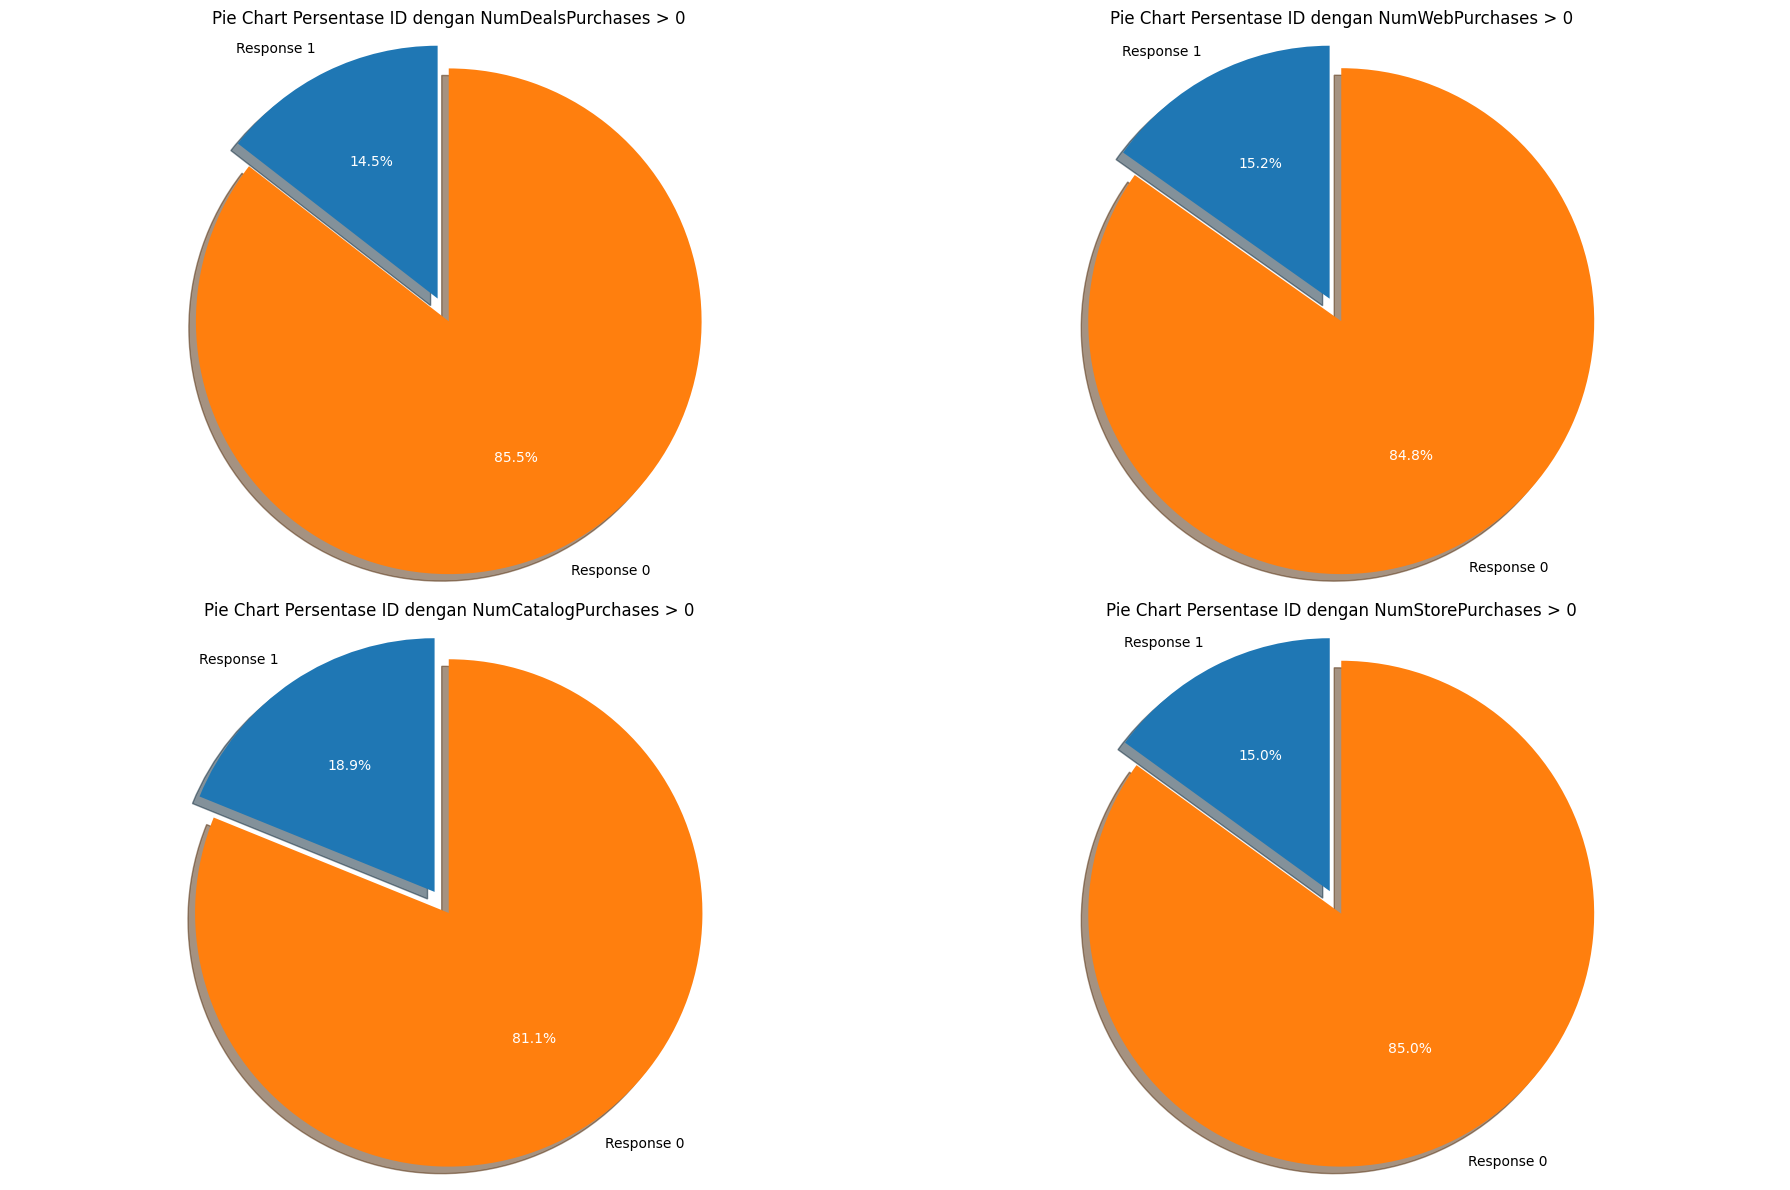

In [23]:
columns_to_plot = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

df_response_1 = df[df['Response'] == 1]

# Filter dataframe untuk Response 0
df_response_0 = df[df['Response'] == 0]
# Hitung total jumlah ID
total_ids = len(df)

# Inisialisasi subplot
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))
axes = axes.flatten()

# Loop untuk setiap kolom
for i, column in enumerate(columns_to_plot):
    # Hitung jumlah ID yang nilai kolom > 0 untuk setiap kelompok
    count_response_1 = (df_response_1[column] > 0).sum()
    count_response_0 = (df_response_0[column] > 0).sum()

    # Hitung persentase dari jumlah ID yang nilai kolom > 1
    percentage_response_1 = count_response_1 / total_ids * 100
    percentage_response_0 = count_response_0 / total_ids * 100

    # Plot pie chart
    explode = (0.1, 0)  # Untuk memberi efek slice terpisah
    pie_chart = axes[i].pie([percentage_response_1, percentage_response_0], labels=['Response 1', 'Response 0'], autopct='%1.1f%%', startangle=90, explode=explode, shadow=True)

    # Ubah warna teks persentase menjadi putih
    for text in pie_chart[2]:
        text.set_color('white')

    # Tambahkan label dan judul
    axes[i].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    axes[i].set_title(f'Pie Chart Persentase ID dengan {column} > 0')

# Tampilkan plot
plt.tight_layout()
plt.show()

<ipython-input-24-06a37b5df06b>:4: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Income', y='Marital_Status', data=df1, jitter=True, palette='Set1')


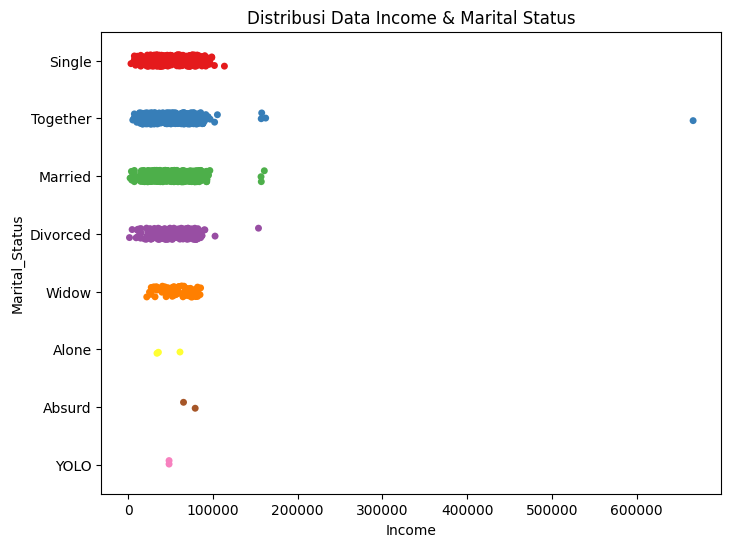

In [24]:
df1 = pd.DataFrame(df)

plt.figure(figsize=(8, 6))
sns.stripplot(x='Income', y='Marital_Status', data=df1, jitter=True, palette='Set1')
plt.title('Distribusi Data Income & Marital Status')
plt.show()

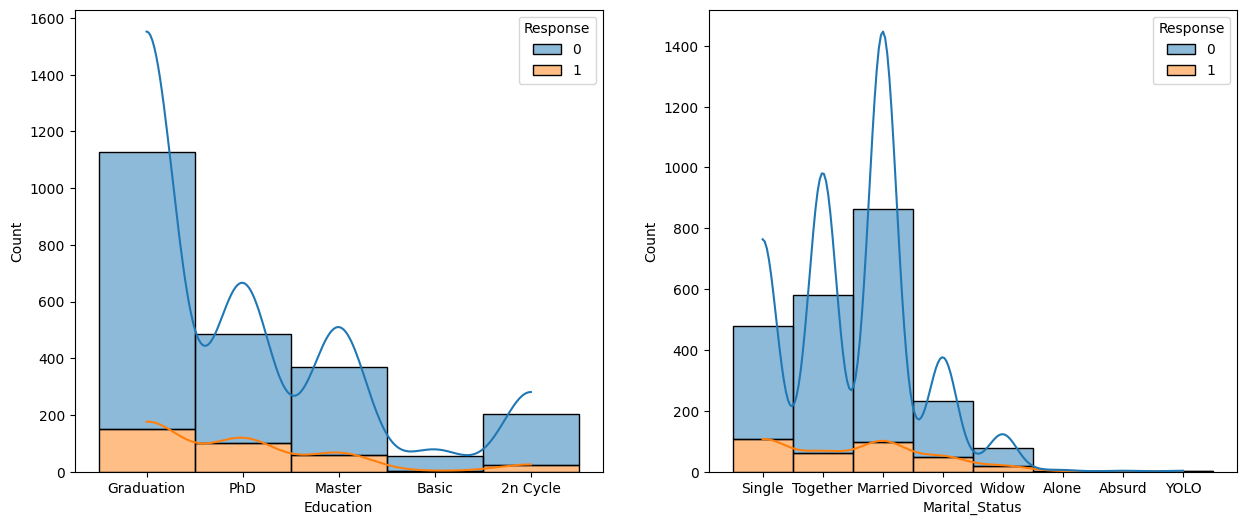

In [25]:
fig, axes = plt.subplots(1, 2, figsize = (15, 6))
for cat, ax in zip(cats, axes.flatten()):
    sns.histplot(x = cat, data=df, hue='Response', multiple = 'stack', bins = 30, kde = True, ax=ax)

<ol>
  <li>Berdasarkan data analisa korelasi heatmap , terdapat beberapa variabel yang berkorelasi positif sedang terhadap respons yaitu: acceptcmp5 0.33. Hasil tersebut dapat diinterpresatikan semakin banyak respon positif maka semakin besar acceptcmp nya semakin tinggi
  </li>
 <br>
  <li>
  <ul>
    <li>Korelasi antara MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts memiliki nilai diatas 0.5 hal ini menunjukan bahwa jika seseorang membeli salah satu produk diatas akan membeli juga 3 lainnya.</li>
    <li>Korelasi antara NumWebVisitsMonth dan produk-produk yang bisa dibeli semuanya negatif hal ini menunjukkan bahwa semakin banyak orang mengunjungi web tidak berarti akan membeli
    </li>
  </ul>
  </li>
</ol>

#4. Business Insight

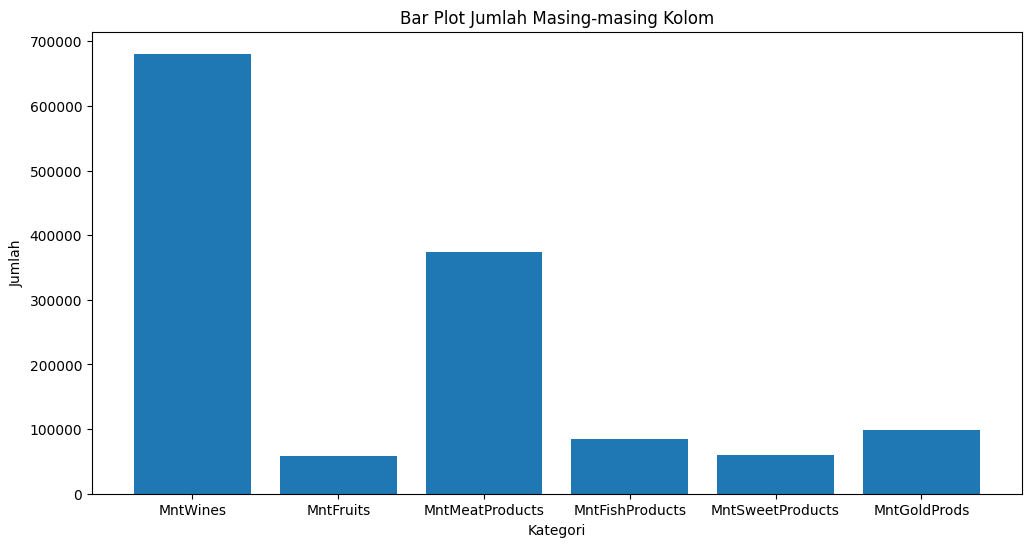

In [26]:
mnt = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
plt.figure(figsize=(12, 6))
# Menghitung total masing-masing kolom
total_mnt = df[mnt].sum()

# Membuat bar plot
plt.bar(total_mnt.index, total_mnt.values)
plt.xlabel('Kategori')
plt.ylabel('Jumlah')
plt.title('Bar Plot Jumlah Masing-masing Kolom')
plt.show()

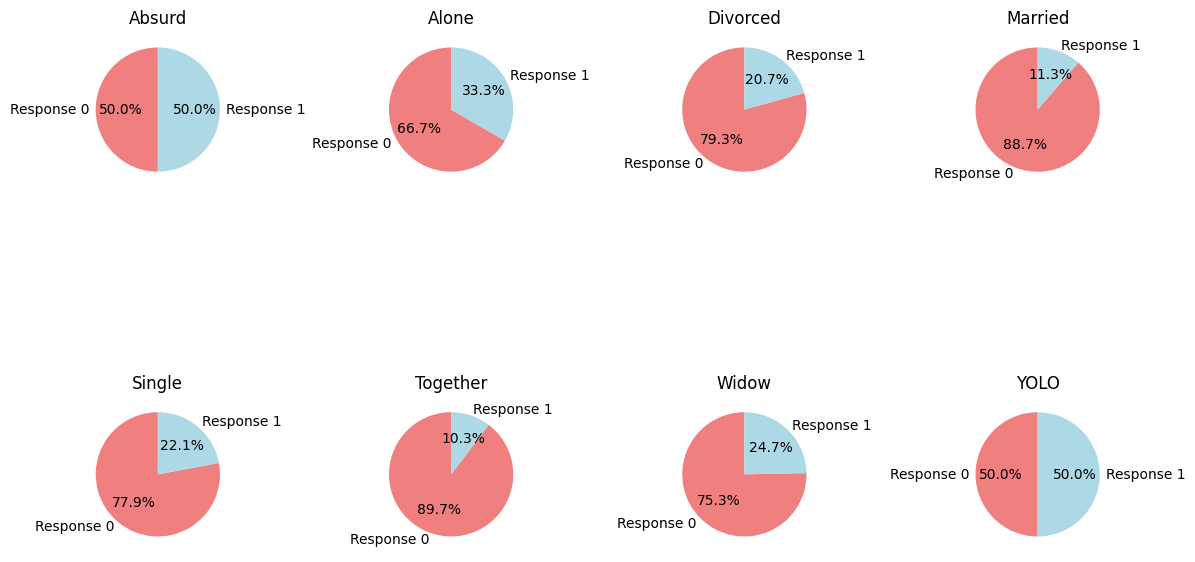

In [27]:
# Membuat pivot table untuk mendapatkan jumlah respons 1 dan 0 untuk setiap kategori marital status
pivot_table = pd.pivot_table(df, values='ID', index='Marital_Status', columns='Response', aggfunc='count', fill_value=0)

# Mendapatkan daftar kategori marital status
categories = pivot_table.index

# Membuat subplot dengan dua baris
fig, axes = plt.subplots(nrows=2, ncols=len(categories)//2, figsize=(12, 8))

# Melakukan plotting untuk setiap kategori
for i, category in enumerate(categories):
    row = i // (len(categories)//2)
    col = i % (len(categories)//2)

    # Mendapatkan data untuk pie chart
    response_0 = pivot_table.loc[category, 0]
    response_1 = pivot_table.loc[category, 1]

    # Membuat pie chart di subplot yang sesuai
    axes[row, col].pie([response_0, response_1], labels=['Response 0', 'Response 1'], autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightblue'], labeldistance=1.1)
    axes[row, col].set_title(f'{category}')

# Menampilkan gambar
plt.tight_layout()
plt.show()

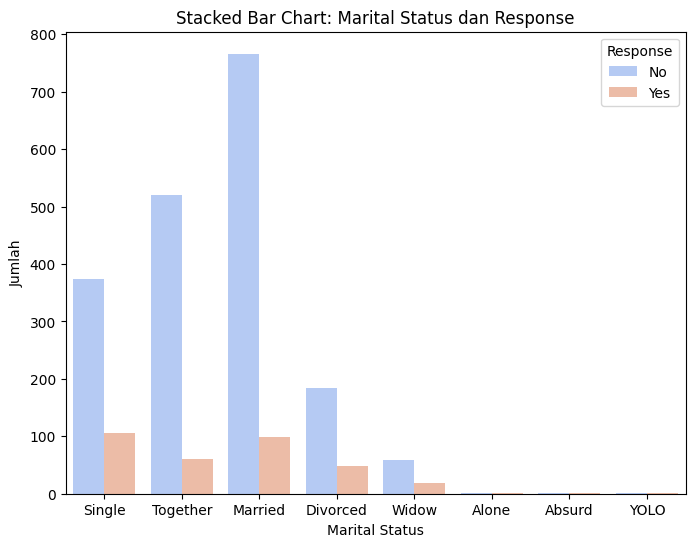

In [28]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Marital_Status', hue='Response', data=df, palette='coolwarm')
plt.title('Stacked Bar Chart: Marital Status dan Response')
plt.xlabel('Marital Status')
plt.ylabel('Jumlah')
plt.legend(title='Response', labels=['No', 'Yes'])
plt.show()


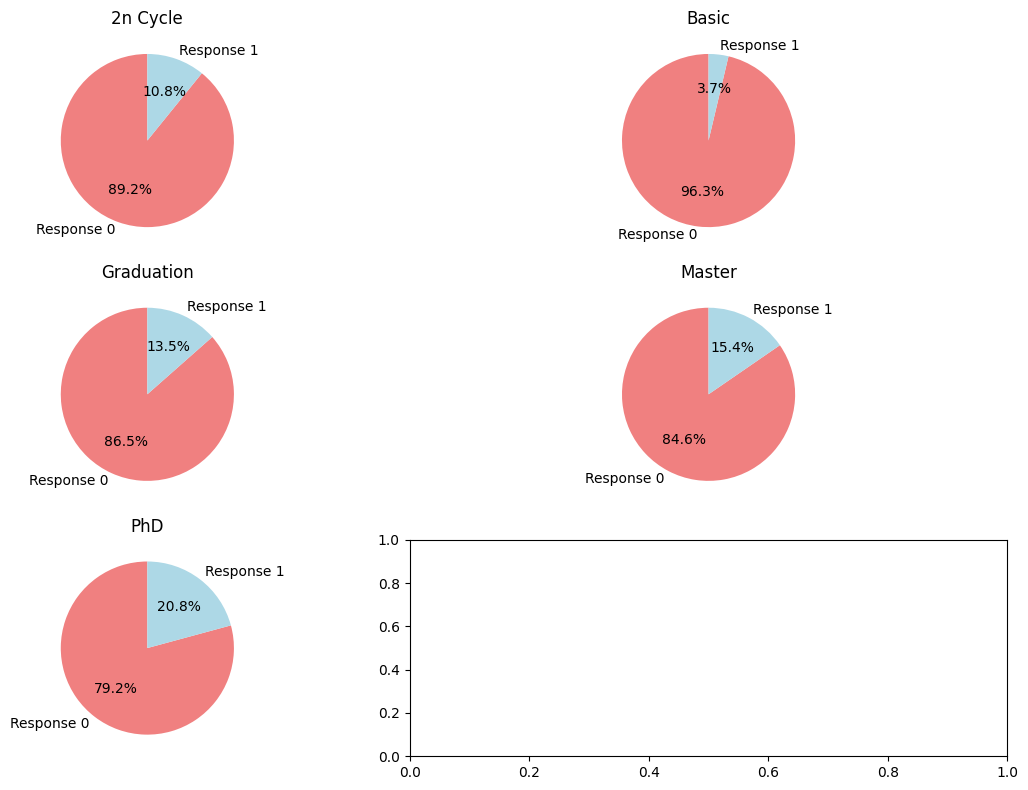

In [29]:
# Membuat pivot table untuk mendapatkan jumlah respons 1 dan 0 untuk setiap kategori marital status
pivot_table = pd.pivot_table(df, values='ID', index='Education', columns='Response', aggfunc='count', fill_value=0)

# Mendapatkan daftar kategori marital status
categories = pivot_table.index

# Membuat subplot dengan dua baris
fig, axes = plt.subplots(nrows=3, ncols=len(categories)//2, figsize=(12, 8))

# Melakukan plotting untuk setiap kategori
for i, category in enumerate(categories):
    row = i // (len(categories)//2)
    col = i % (len(categories)//2)

    # Mendapatkan data untuk pie chart
    response_0 = pivot_table.loc[category, 0]
    response_1 = pivot_table.loc[category, 1]

    # Membuat pie chart di subplot yang sesuai
    axes[row, col].pie([response_0, response_1], labels=['Response 0', 'Response 1'], autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightblue'], labeldistance=1.1)
    axes[row, col].set_title(f'{category}')

# Menampilkan gambar
plt.tight_layout()
plt.show()

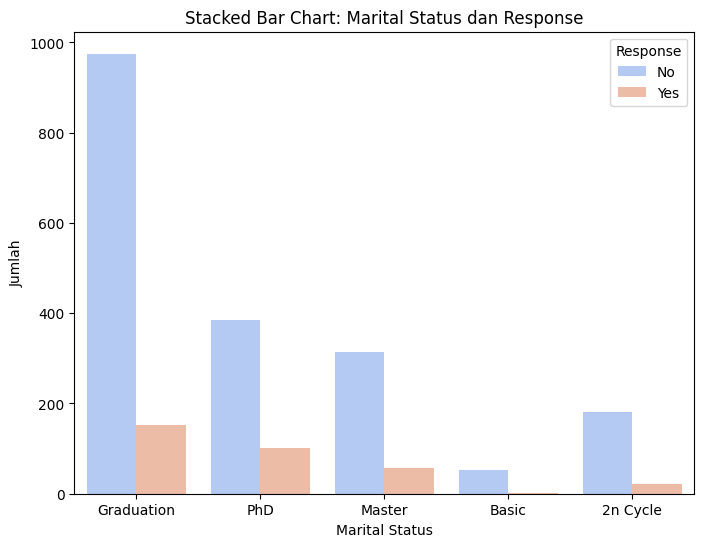

In [30]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Education', hue='Response', data=df, palette='coolwarm')
plt.title('Stacked Bar Chart: Marital Status dan Response')
plt.xlabel('Marital Status')
plt.ylabel('Jumlah')
plt.legend(title='Response', labels=['No', 'Yes'])
plt.show()


<ipython-input-31-c37409b58713>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = df.groupby('Marital_Status').sum()


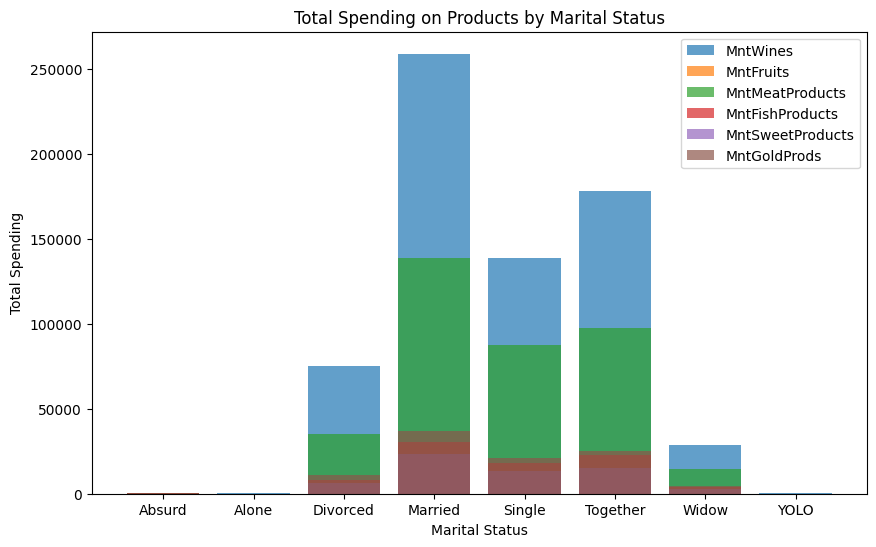

In [31]:
# Mengelompokkan data berdasarkan status pernikahan
grouped_data = df.groupby('Marital_Status').sum()

# Membuat stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))

products = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Plotting untuk setiap jenis produk
for product in products:
    ax.bar(grouped_data.index, grouped_data[product], label=product, alpha=0.7)

# Menambahkan label dan judul
ax.set_xlabel('Marital Status')
ax.set_ylabel('Total Spending')
ax.set_title('Total Spending on Products by Marital Status')

# Menambahkan legenda
ax.legend()

# Menampilkan grafik
plt.show()

    

1.   Pada data korelasi pembelian pada toko terbanyak pada kategori wines, produk yang paling banyak dibeli juga adalah wines. Sehingga stok harus selalu dipastikan tersedia.
2.   Dari marital status jika kita mengesampingkan alone, absurd, dan YOLO yang diperkirakan adalah outliers, kategori widow memiliki persentase terbesar yaitu 24,7% terhadap response. Disarankan untuk campaign selanjutnya untuk menargetkan pelanggan dengan status Widow untuk efesiensi
3. Dari Education kategori PhD memiliki persentase terbesar yaitu 20,8% terhadap response. Disarankan untuk campaign selanjutnya untuk menargetkan pelanggan dengan tingkat pendidikan PhD untuk efesiensi


    